In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [19]:
#Base de Treino
df_name = 'train'
df = pd.read_csv(f'D:/Backup/Estudos Python/Kaggle/Titanic Challenge/{df_name}.csv')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
#Utilizaçao do modelo de treino para ensinar a IA
y = df['Survived'] #Váriavel Resposta
features = ['Pclass', 'Sex', 'SibSp', 'Parch'] #Colunas para serem votatas no modelo de aprendizado

x = pd.get_dummies(df[features]) #variáveis dummy, que são representações numéricas usadas em modelos de aprendizado de máquina. Isso é feito para que o modelo possa trabalhar com essas variáveis de forma adequada.
x_test = pd.get_dummies(df[features])

model = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state= 1)
model.fit(x, y)
predictions = model.predict(x_test)

#Salvar modelo aprendido


In [56]:
#Utilização do aprendizado anterior na planilha que precisa de valores previstos

df_to_be_predicted = pd.read_csv('test.csv')

x_new = pd.get_dummies(df_to_be_predicted[features])

predictions_new = model.predict(x_new)

df_to_be_predicted['Survived'] = predictions_new

df_to_be_predicted.to_excel('Test Predicted.xlsx', index=False) #Salvar para comparação e analise posterior em Excel

df_to_be_predicted.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [10]:
np.mean(df.query('Age > 0 and Survived == 1')['Age'])

28.343689655172415

In [58]:
#Limpeza para Submissão

excluded_collumns = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

df_to_be_predicted = df_to_be_predicted.drop(columns=excluded_collumns)

df_to_be_predicted.to_csv('subsmission doug.csv', index= False)


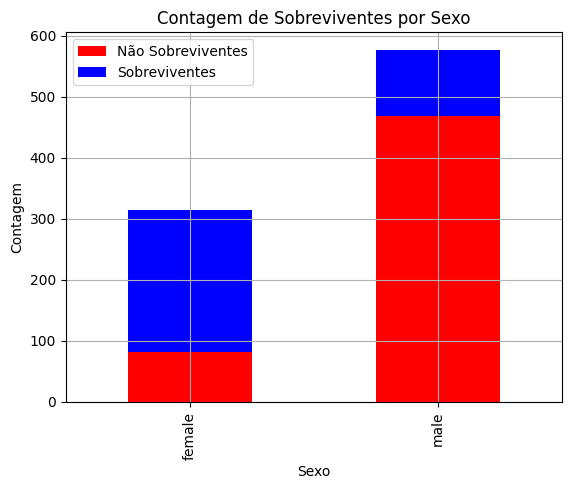

In [37]:
contagem = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotar o gráfico de barras
contagem.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Contagem de Sobreviventes por Sexo')
plt.legend(['Não Sobreviventes', 'Sobreviventes'], loc='upper left')
plt.grid()
plt.show()